<a href="https://colab.research.google.com/github/lissemAR/AluraStoreLatam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



# **Alura Store**  
Durante este desafío, ayudarás al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. Para ello, analizarás datos de ventas, rendimiento y reseñas de las 4 tiendas de Alura Store. El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos.

In [108]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [109]:
import matplotlib.pyplot as plt
import matplotlib as mlp
import numpy as np
import plotly.graph_objects	as go
import plotly.express as px


#1. Análisis de facturación



In [110]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

In [187]:
facturacion = [tienda['Precio'].sum() for tienda  in tiendas]

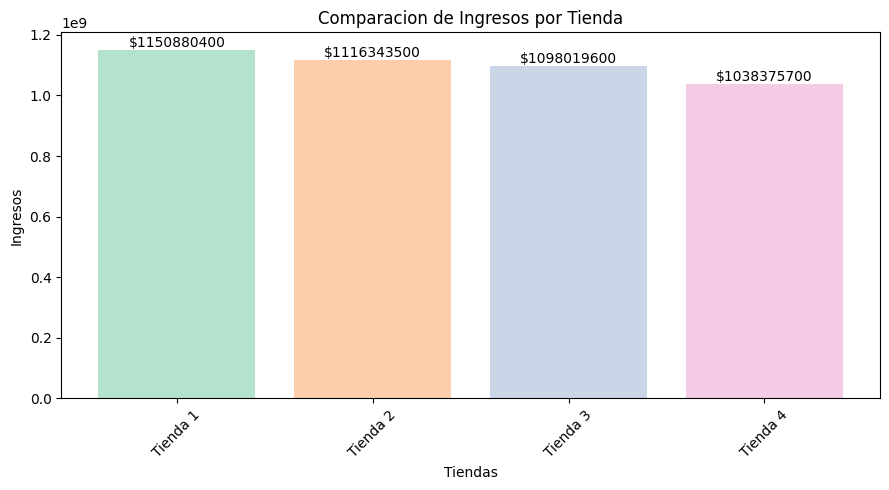

In [112]:
def ingresos_totales():
    plt.figure(figsize=(9, 5))
    colores = mlp.colormaps['Pastel2']
    colors = [colores(i) for i in range(len(nombres))]
    bars = plt.bar(nombres, facturacion, color=colors)

    plt.xlabel('Tiendas')
    plt.ylabel('Ingresos')
    plt.title('Comparacion de Ingresos por Tienda')
    plt.xticks(rotation=45)

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1000,
            f'${int(height)}',
            ha='center', va='bottom', fontsize=10
        )

    plt.tight_layout()
    plt.show()

ingresos_totales()



# 2. Ventas por categoría

In [113]:
def categorias_tiendas(tienda, nombre):
  categorias = {}
  for i in range(len(tienda)):
      categoria = tienda.loc[i, "Categoría del Producto"]

      if categoria in categorias:
          categorias[categoria] += 1
      else:
          categorias[categoria] = 1
  print(categorias)
  return graficar_categorias(categorias, nombre)

In [114]:
def graficar_categorias(categorias, nombre):
    plt.figure(figsize=(9, 5))
    colores = mlp.colormaps['Pastel2']
    colors = [colores(i) for i in range(len(nombres))]
    plt.bar(categorias.keys(), categorias.values(), color=colors)

    plt.xlabel('Categoría del Producto')
    plt.ylabel('Total vendido')
    plt.title(f'Cantidad de Productos por Categoría en {nombre}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


{'Electrónicos': 448, 'Muebles': 465, 'Juguetes': 324, 'Electrodomésticos': 312, 'Artículos para el hogar': 171, 'Deportes y diversión': 284, 'Libros': 173, 'Instrumentos musicales': 182}


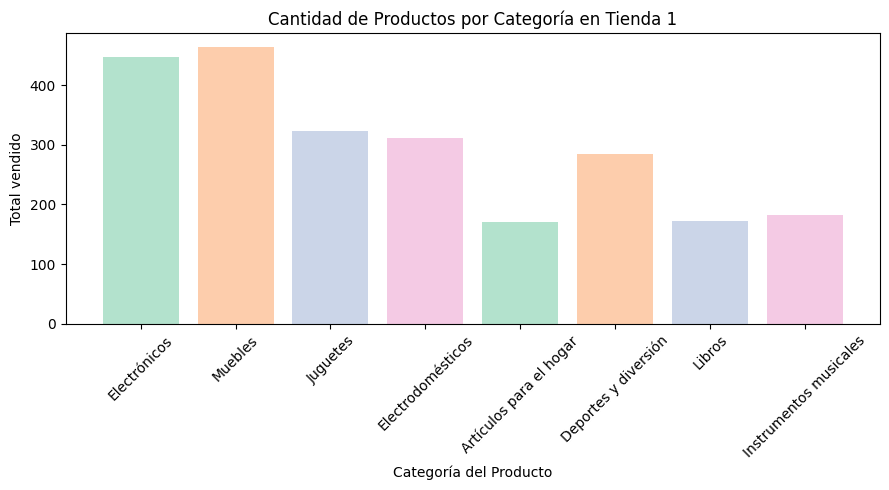

{'Muebles': 442, 'Instrumentos musicales': 224, 'Deportes y diversión': 275, 'Electrónicos': 422, 'Artículos para el hogar': 181, 'Juguetes': 313, 'Electrodomésticos': 305, 'Libros': 197}


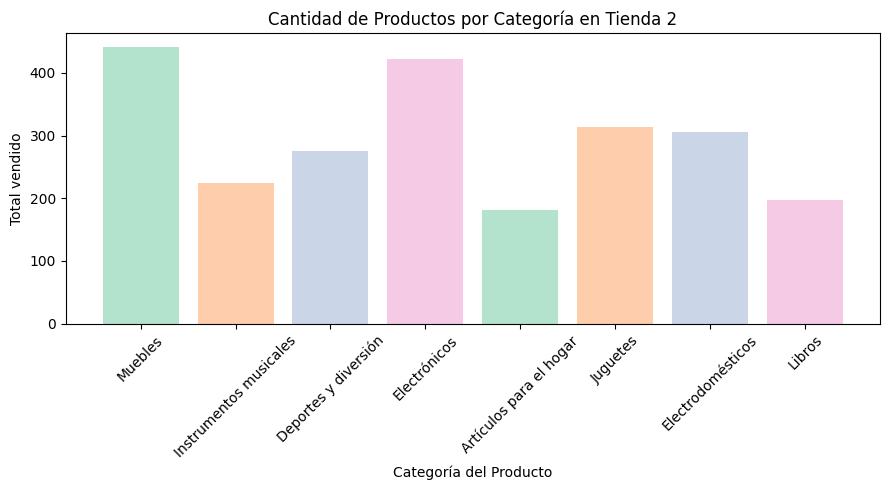

{'Electrodomésticos': 278, 'Muebles': 499, 'Instrumentos musicales': 177, 'Deportes y diversión': 277, 'Electrónicos': 451, 'Juguetes': 315, 'Artículos para el hogar': 177, 'Libros': 185}


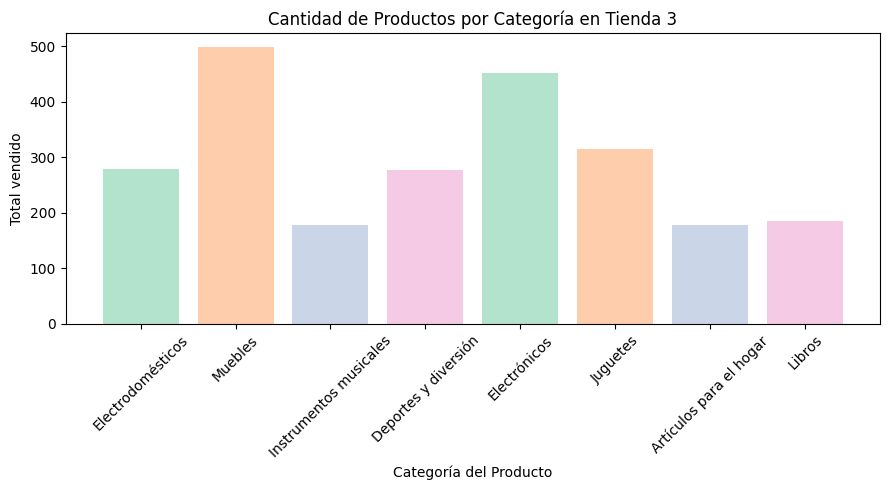

{'Electrodomésticos': 254, 'Muebles': 480, 'Deportes y diversión': 277, 'Libros': 187, 'Electrónicos': 451, 'Instrumentos musicales': 170, 'Juguetes': 338, 'Artículos para el hogar': 201}


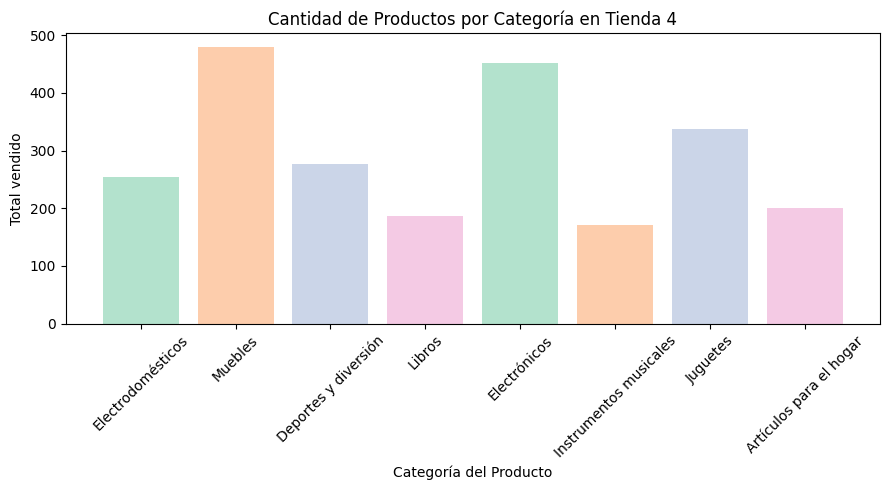

In [115]:
lista_categorias = [categorias_tiendas(tienda, i) for tienda, i in zip(tiendas, nombres)]

# 3. Calificación promedio de la tienda


In [116]:
def promedios(tienda):
  promedio = round(tienda['Calificación'].sum()/len(tienda),2)
  return promedio

[np.float64(3.98), np.float64(4.04), np.float64(4.05), np.float64(4.0)]


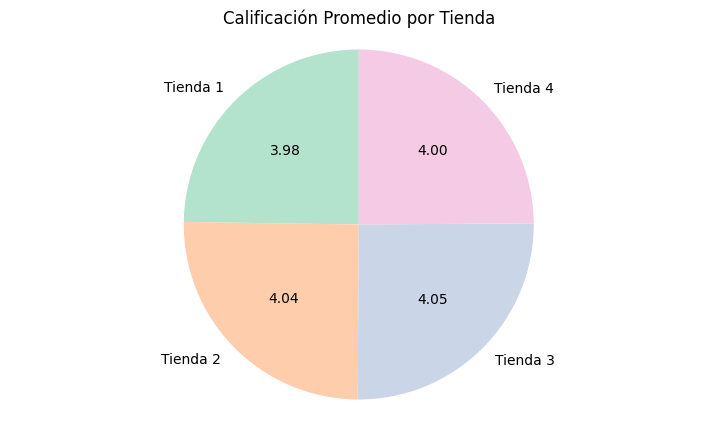

In [117]:
valores = [promedios(tienda) for tienda in tiendas]
print(valores)
def promedio_tienda(pct, valores):
  total = sum(valores)
  valor = pct * total / 100.0
  return f'{valor:.2f}'

plt.figure(figsize=(9, 5))
colores = mlp.colormaps['Pastel2']
colors = [colores(i) for i in range(len(nombres))]
plt.pie(valores, labels=nombres, autopct=lambda pct: promedio_tienda(pct, valores),
        startangle=90, colors=colors)
plt.title('Calificación Promedio por Tienda')
plt.axis('equal')
plt.show()

# 4. Productos más y menos vendidos

In [129]:
def productos_mayor_menor(tienda):
  productos = {}
  for i in range(len(tienda)):
      producto = tienda.loc[i, "Producto"]

      if producto in productos:
          productos[producto] += 1
      else:
          productos[producto] = 1
  productos_ordenados = dict(sorted(productos.items(), key=lambda item: item[1], reverse=True))
  mas_vendido = next(iter(productos_ordenados.items()))
  menos_vendido = next(reversed(productos_ordenados.items()))
  return mas_vendido, menos_vendido, productos_ordenados

In [156]:
def mostrar_productos_mas_vendidos(tienda,nombre):
    mas_vendido, menos_vendido, productos_ordenados = productos_mayor_menor(tienda)

    productos= [mas_vendido[0], menos_vendido[0]]
    cantidades = [mas_vendido[1], menos_vendido[1]]

    colores = [ '#b0eed9','#ff7ea8']
    plt.figure(figsize=(9, 5))
    bars = plt.barh(productos, cantidades, color=colores)

    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
            f'{int(width)} ventas',va='center')

    plt.xlim(0, max(cantidades) + 10)
    plt.xlabel('Cantidad')
    plt.ylabel('Productos')
    plt.title(f'Comparacion de Productos más y menos vendidos por {nombre}')
    plt.tight_layout()
    plt.show()



In [167]:
def mostrar_productos_ordenados(tienda, nombre):
    _, _, productos_ordenados = productos_mayor_menor(tienda)

    productos = list(productos_ordenados.keys())
    cantidades = list(productos_ordenados.values())

    plt.figure(figsize=(9, 15))
    colores = mlp.colormaps['Pastel2']
    colors = [colores(i) for i in range(len(nombres))]
    bars = plt.barh(productos, cantidades, color=colors)

    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
                 f'{int(width)}', va='center')

    plt.xlabel("Cantidad de Ventas")
    plt.title(f"Productos Ordenados por Ventas en {nombre}")
    plt.tight_layout()
    plt.show()


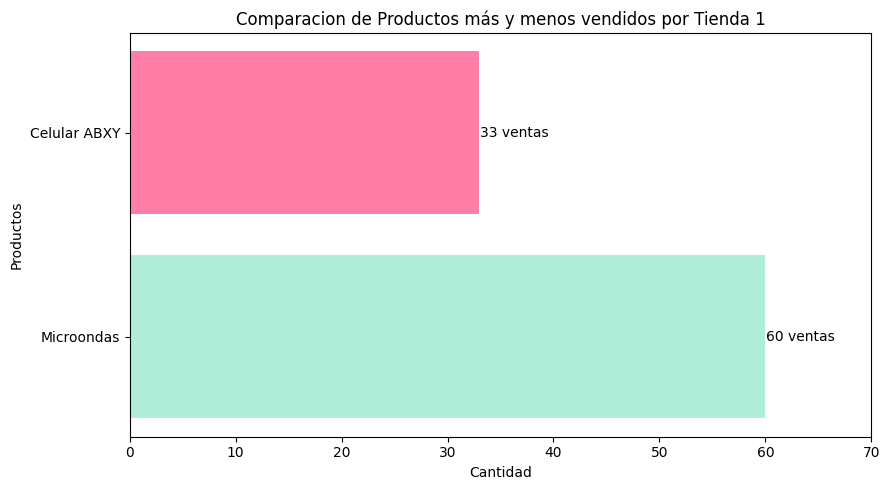

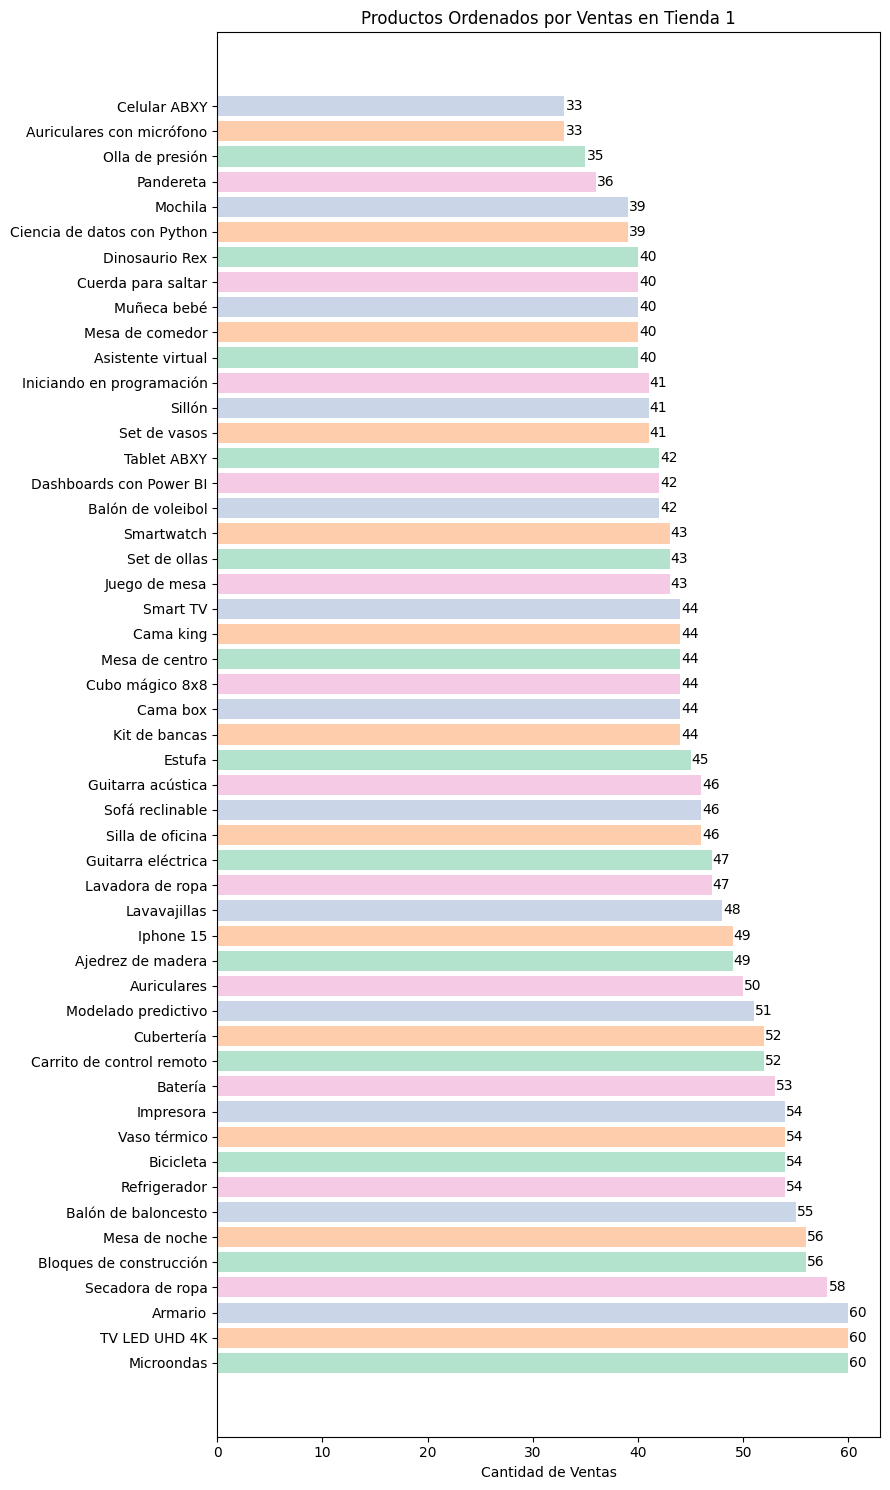

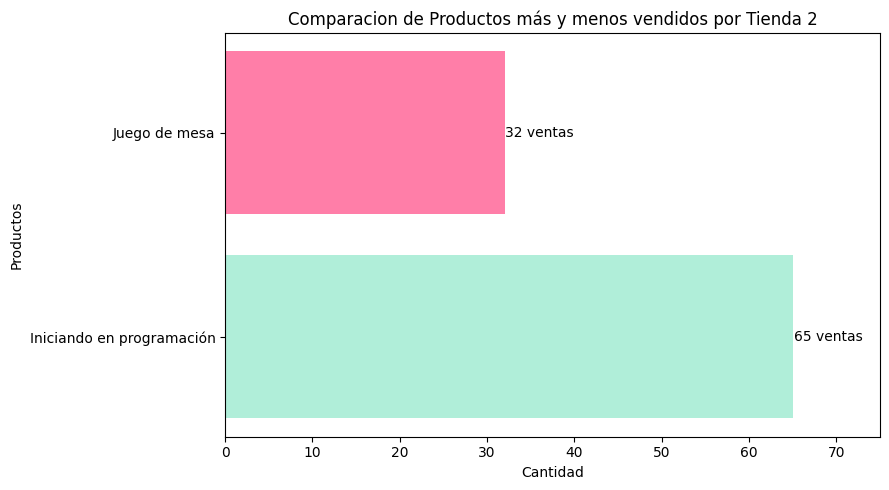

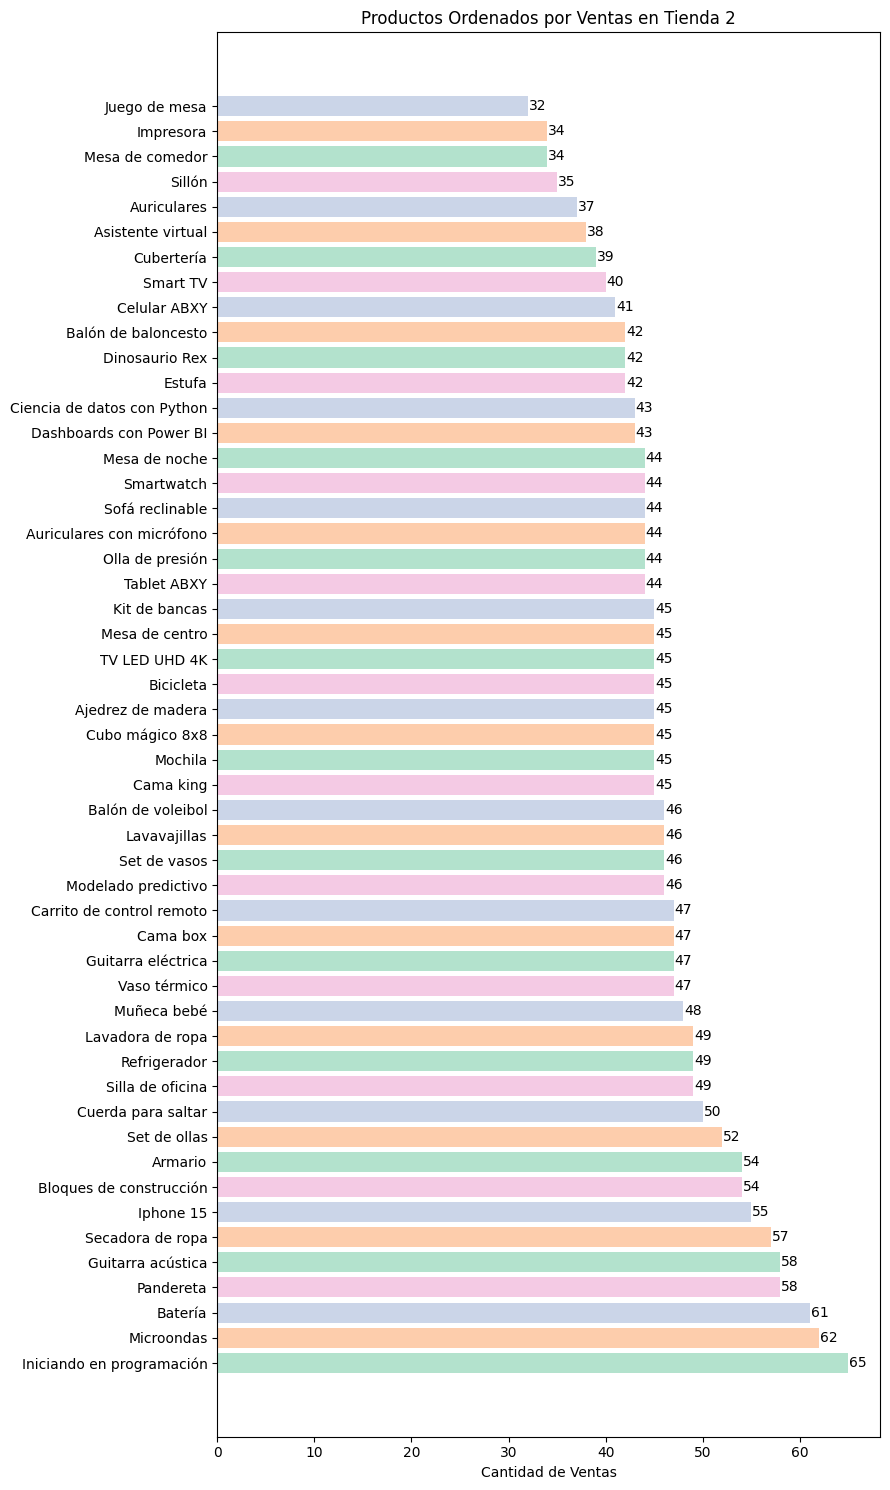

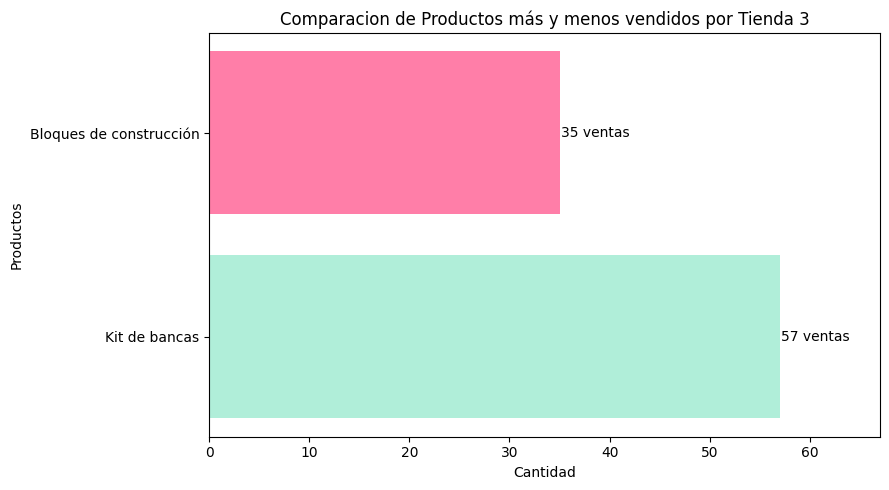

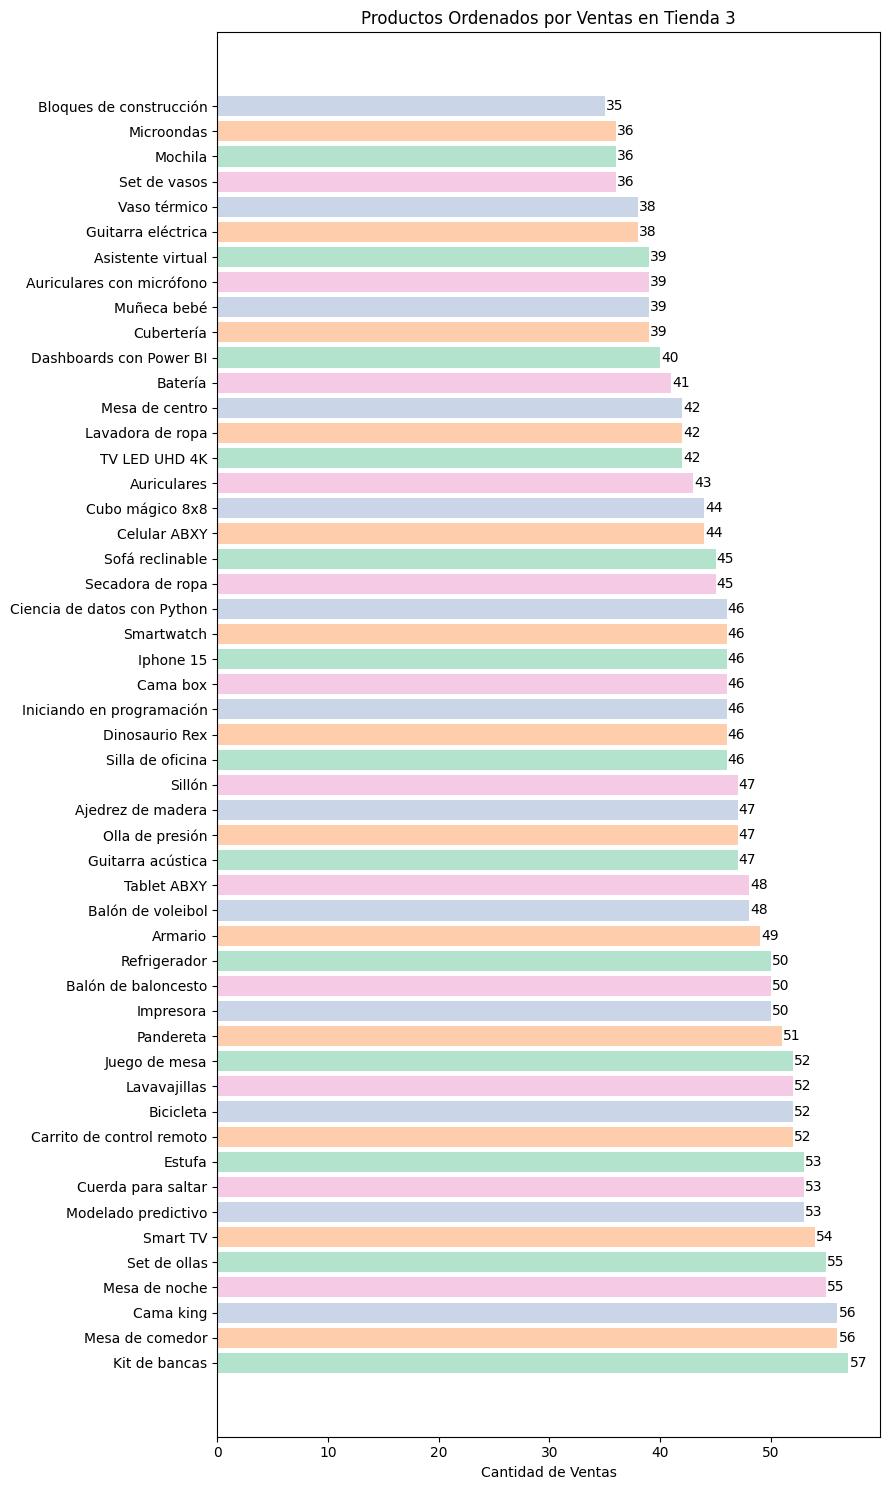

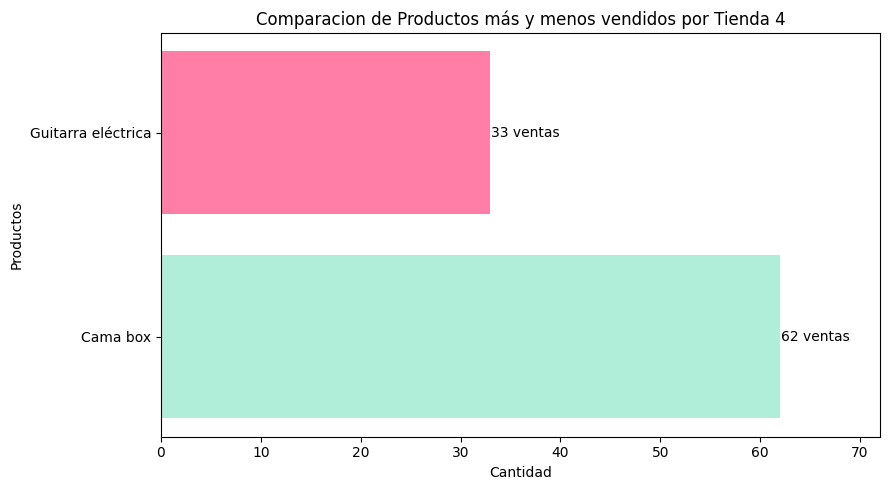

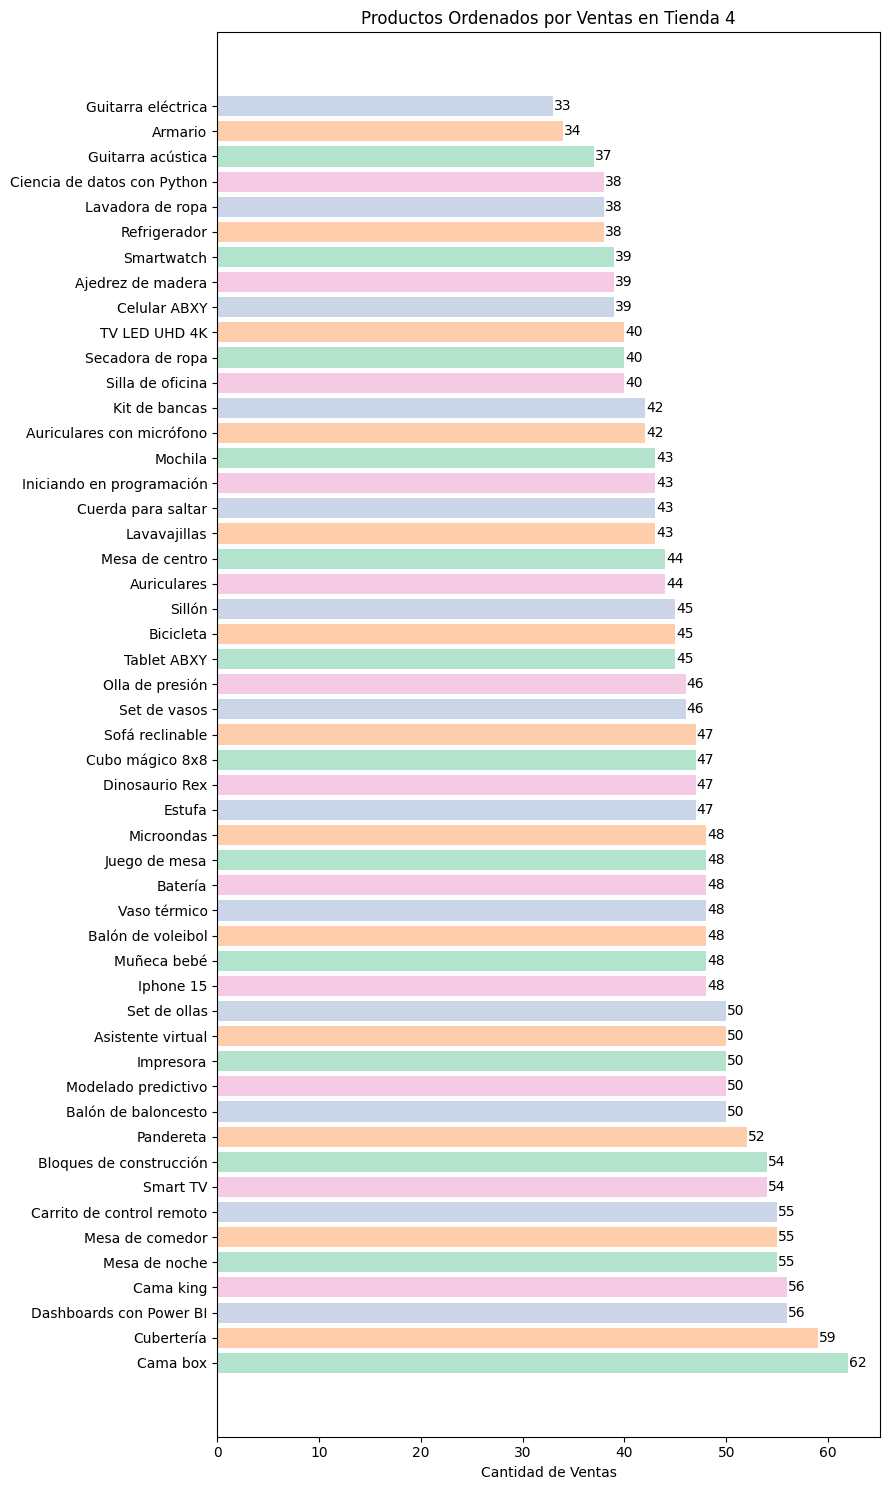

In [168]:
for tienda, nombre in zip(tiendas, nombres):
  mostrar_productos_mas_vendidos(tienda, nombre)
  mostrar_productos_ordenados(tienda, nombre)

# 5. Envío promedio por tienda

In [172]:
def promedio_envios(tienda):
  promedio = round(tienda['Costo de envío'].sum()/len(tienda),2)
  return float(promedio)

lista_promedios = [promedio_envios(tienda) for tienda in tiendas]

In [174]:
def grafica_promedio_envios(promedios):
  plt.figure(figsize=(9, 5))
  colores = mlp.colormaps['Pastel2']
  colors = [colores(i) for i in range(len(nombres))]

  bars = plt.bar(nombres, promedios, color=colors)

  plt.xlabel('Tiendas')
  plt.ylabel('Costo de Envío')
  plt.title('Comparacion de Costo de Envío por Tienda')
  plt.xticks(rotation=45)

  max_value = max(promedios)
  plt.ylim(0, max_value + 2000)

  for bar in bars:
      height = bar.get_height()
      plt.text(
          bar.get_x() + bar.get_width() / 2,
          height + 1000, f'${int(height)}', ha='center', va='bottom', fontsize=10)

  plt.tight_layout()
  plt.show()

In [184]:
def grafica_Promedio_envios_a_pie(promedios):
  plt.figure(figsize=(9, 9))
  colores = mlp.colormaps['Pastel2']
  colors = [colores(i) for i in range(len(promedios))]
  plt.pie(promedios, labels=nombres, autopct="%1.1f%%", startangle=90, colors=colors)

  plt.title('Comparacion de Costo de Envío por Tienda')
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

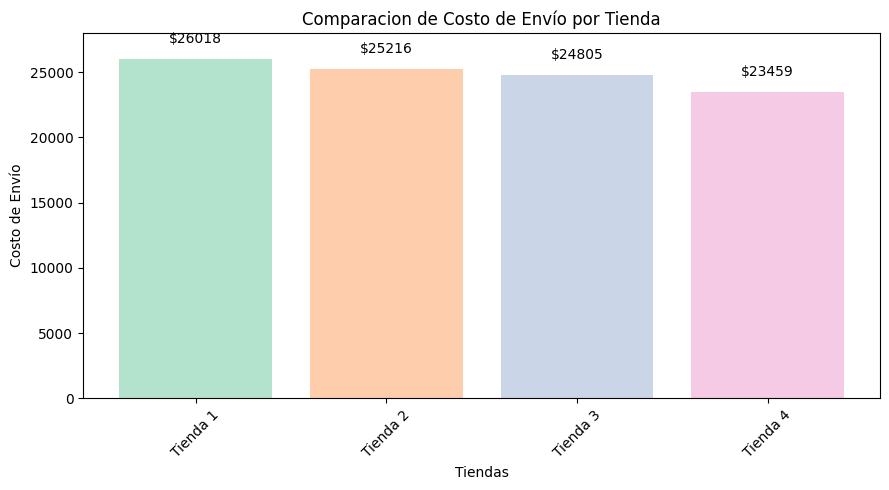

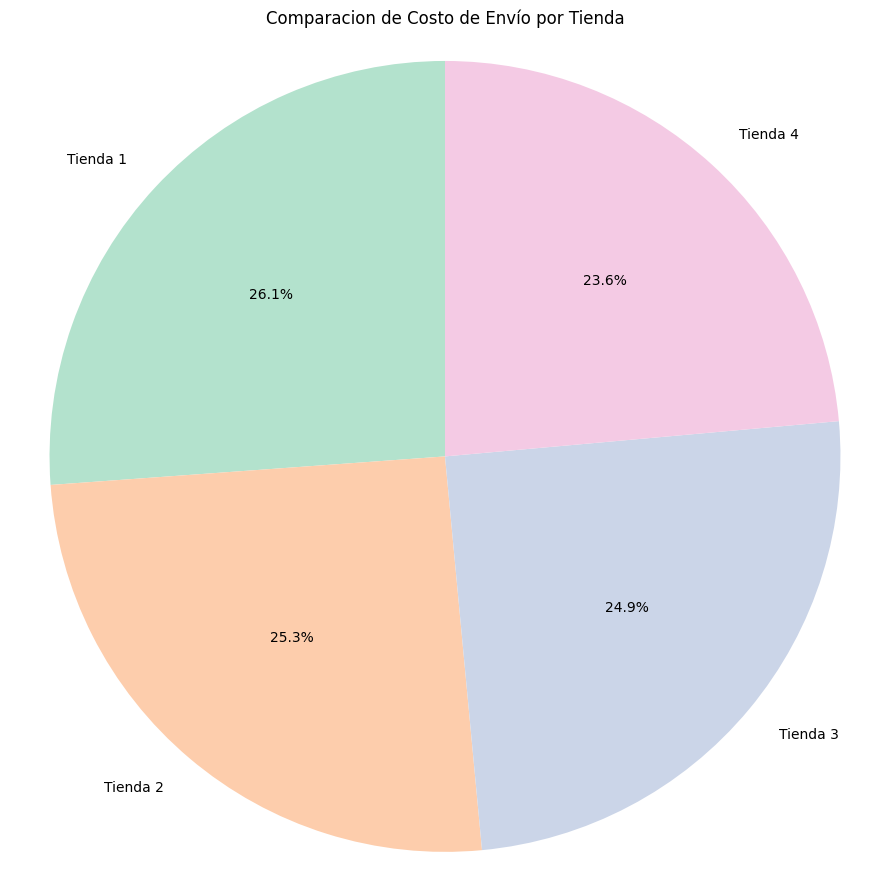

In [185]:
grafica_promedio_envios(lista_promedios)
grafica_Promedio_envios_a_pie(lista_promedios)


# Informe Final

Segun lo analizado en los informes, la tienda  que debe dar en venta es la  **tienda #4**

### 1. Ingresos totales

El ingreso total de cada tienda se calculó sumando los precios de los productos vendidos:

* Tienda 1: $1.150.880.400

* Tienda 2: $1.116.343.500

* Tienda 3: $1.098.019.600

* Tienda 4: $1.038.375.700


**Nota:** La Tienda 1 ocupa el primer lugar en ingresos en comparación con las demás. No obstante, cabe destacar que los ingresos por sí solos no aseguran la sostenibilidad. Es esencial complementar este desempeño con una adecuada atención al cliente y una logística eficiente.

###2. Categorias de produrctos mas y menos vendidos

Se analizaron las cantidades de productos vendidos según las categorías en cada tienda. A continuación, se presenta el resumen:


**Tienda 1**
* Muebles: 465

* Electrónicos: 448

* Juguetes: 324

* Deportes y diversión: 284

* Electrodomésticos: 312

* Instrumentos musicales: 182

* Libros: 173

* Artículos para el hogar: 171

**Tienda 2**

* Muebles: 442

* Electrónicos: 422

* Juguetes: 313

* Deportes y diversión: 275

* Electrodomésticos: 305

* Instrumentos musicales: 224

* Libros: 197

* Artículos para el hogar: 181

**Tienda 3**

* Muebles: 499

* Electrónicos: 451

* Juguetes: 315

* Deportes y diversión: 277

* Electrodomésticos: 278

* Instrumentos musicales: 177

* Libros: 185

* Artículos para el hogar: 177

**Tienda 4**

* Muebles: 480

* Electrónicos: 451

* Juguetes: 338

* Deportes y diversión: 277

* Electrodomésticos: 254

* Instrumentos musicales: 170

* Libros: 187

* Artículos para el hogar: 201

Todas las tiendas tienen como principales categorías de venta los **Muebles y Electrónicos**. Sin embargo, la **Tienda 2** destaca por tener una distribución más equilibrada entre las diferentes categorías, mostrando un buen desempeño también en **Instrumentos musicales y Libros.** Por otro lado, la **Tienda 4** registra altos números en **Muebles y Juguetes**, pero exhibe un rendimiento más bajo en otras categorías importantes.

### 3. Promedio de clientes

El análisis de satisfacción del cliente se realizó mediante la calificación promedio obtenida por cada tienda:

* **Tienda 1:** 3.98

* **Tienda 2:** 4.04

* **Tienda 3:** 4.05

* **Tienda 4:** 4.0

Se observa que, aunque la **Tienda 1** generó los mayores ingresos, también recibió la calificación más baja en satisfacción de los clientes. La sigue la **Tienda 4**, que registró los menores ingresos de las cuatro.

Con base en estos resultados, la decisión sobre qué tienda eliminar estaría entre **la Tienda 1 y la Tienda 4.**

### **Resumen**
**Tienda 1:** Aunque lidera en ingresos, tiene la peor calificación de los clientes y el coste de envío más alto. Esto sugiere posibles problemas logísticos o de atención al cliente que podrían comprometer su sostenibilidad.

**Tienda 2:** Destaca por su equilibrio. Aunque no es líder en ninguna área específica, muestra una buena distribución de ventas por categorías, calificaciones positivas y un coste de envío aceptable.

**Tienda 3:** Obtiene la mejor calificación promedio, ingresos adecuados y un coste de envío moderado, lo que la hace sólida.

**Tienda 4:** Es la menos eficiente en general, con los ingresos más bajos, la segunda peor calificación, y aunque tiene el coste de envío más bajo, su desempeño en ventas por categorías clave es débil.

### **Recomendación**
Se sugiere al Sr. Juan considerar la eliminación de la **Tienda 4**, ya que su bajo rendimiento general no compensa el único aspecto positivo de tener un coste de envío más bajo. Mejorar la logística en otra tienda, como la **Tienda 1,** podría ayudar a mitigar el impacto de este ajuste y potenciar la sostenibilidad del negocio.